In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. In the above dataset, 

### a. In case age is less than 18, replace it with mean of age values.

In [19]:
Customer_Acq = pd.read_csv('C:/Python/Class/Exercise/Exercise/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
Customer_Acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [13]:
Customer_Acq['Age'] = np.where (Customer_Acq['Age'] <18,Customer_Acq['Age'].mean(),Customer_Acq['Age'] )
Customer_Acq.head(15)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [16]:
spend_amt = pd.read_csv('C:/Python/Class/Exercise/Exercise/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv')
spend_amt.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [26]:
cust_spend = pd.merge(left = Customer_Acq, right = spend_amt, on = 'Customer')
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [28]:
cust_spend['Amount'] = np.where (cust_spend['Amount'] > cust_spend['Limit'],cust_spend['Limit']/2 ,cust_spend['Amount'] )
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [49]:
repayment = pd.read_csv('C:/Python/Class/Exercise/Exercise/4. Pandas Case Study 2 - Credit Card Case Study/repayment.csv')
del repayment['Unnamed: 4']
repayment.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [50]:
cust_repay = pd.merge(left = Customer_Acq, right = repayment, on = ['Customer'])
cust_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88


In [52]:
cust_repay['Amount'] = np.where (cust_repay['Amount'] > cust_repay['Limit'],cust_spend['Limit'] ,cust_spend['Amount'] )
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [55]:
Customer_Acq['Customer'].nunique()

100

### b. How many distinct categories exist?

In [56]:
Customer_Acq['Product'].nunique()

3

### c. What is the average monthly spend by customers?


In [78]:
cust_spend['Month'] = pd.to_datetime(cust_spend['Month'])
cust_spend['month'] = cust_spend['Month'].dt.month_name()
cust_spend.groupby(['Customer', 'month'])[['Amount']].mean().add_prefix("AvgOf_").reset_index()

,Customer,month,AvgOf_Amount
0,A1,April,261649.250000
1,A1,August,344372.100000
2,A1,February,175235.690000
3,A1,January,372762.587143
4,A1,May,361141.310000
...,...,...,...
573,A95,January,240401.500000
574,A96,January,54729.660000
575,A97,January,5000.000000
576,A98,January,5000.500000


### d. What is the average monthly repayment by customers?


In [76]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])
cust_repay['month'] = cust_repay['Month'].dt.month_name()
cust_repay.groupby(['Customer', 'month'])[['Amount']].mean().add_prefix("AvgOf_").reset_index()

,Customer,month,AvgOf_Amount
0,A1,April,370948.320000
1,A1,February,156275.716000
2,A1,January,384438.462857
3,A1,July,244534.680000
4,A1,November,264105.855000
...,...,...,...
553,A95,January,240401.500000
554,A96,January,54729.660000
555,A97,January,5000.000000
556,A98,January,5000.500000


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [197]:
cust_profit = pd.merge(left = spend_amt, right = repayment, on = ['Customer','Month'])

#calculate monthly profit
cust_profit['Profit'] = np.where (cust_profit['Amount_y']-cust_profit['Amount_x'] > 0, ((cust_profit['Amount_y']-cust_profit['Amount_x']) * 2.9)/100, 0)
cust_profit.head()

,Sl No:,Customer,Month,Type,Amount_x,SL No:,Amount_y,Profit
0,1,A1,12-Jan-04,JEWELLERY,485470.80,NaN,495414.75,288.37455
1,1,A1,12-Jan-04,JEWELLERY,485470.80,103.0,350446.82,0.00000
2,103,A1,12-Jan-04,TRAIN TICKET,440563.22,NaN,495414.75,1590.69437
3,103,A1,12-Jan-04,TRAIN TICKET,440563.22,103.0,350446.82,0.00000
4,2,A1,3-Jan-04,PETRO,410556.13,2.0,245899.02,0.00000


### f. What are the top 5 product types?

In [86]:
cust_spend['Type'].value_counts().head()

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g. Which city is having maximum spend?

In [102]:
cust_spend.groupby('City').Amount.sum().reset_index().sort_values('Amount', ascending = False).head(1)

,City,Amount
4,COCHIN,45963513.5


### h. Which age group is spending more money?

In [105]:
cust_spend.groupby('Age').Amount.sum().reset_index().sort_values('Amount', ascending = False).head()

,Age,Amount
10,28,17365270.23
53,78,12329508.54
18,37,9992645.71
7,25,9749700.72
29,51,9670808.79


### i. Who are the top 10 customers in terms of repayment?

In [109]:
cust_repay.groupby('Customer').Amount.sum().reset_index().sort_values('Amount', ascending = False).head(10)

,Customer,Amount
57,A60,11020930.98
32,A38,9102803.62
35,A40,9061868.60
58,A61,9002326.39
5,A13,8231607.26
4,A12,8183050.64
33,A39,7750508.22
6,A14,7661086.20
37,A42,7116225.74
36,A41,7074413.17


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [138]:
cust_spend['year'] = cust_spend['Month'].dt.year
city_spend = cust_spend.groupby(by = ['City','Product','year'])[['Amount']].sum().add_prefix('SumOf_')
city_spend = city_spend.reset_index()
city_spend

,City,Product,year,SumOf_Amount
0,BANGALORE,Gold,2004,9289878.54
1,BANGALORE,Gold,2005,12892362.99
2,BANGALORE,Gold,2006,12030611.09
3,BANGALORE,Platimum,2004,1112732.30
4,BANGALORE,Platimum,2005,912284.97
...,...,...,...,...
67,TRIVANDRUM,Platimum,2005,3601443.30
68,TRIVANDRUM,Platimum,2006,2147403.75
69,TRIVANDRUM,Silver,2004,209667.48
70,TRIVANDRUM,Silver,2005,269912.99


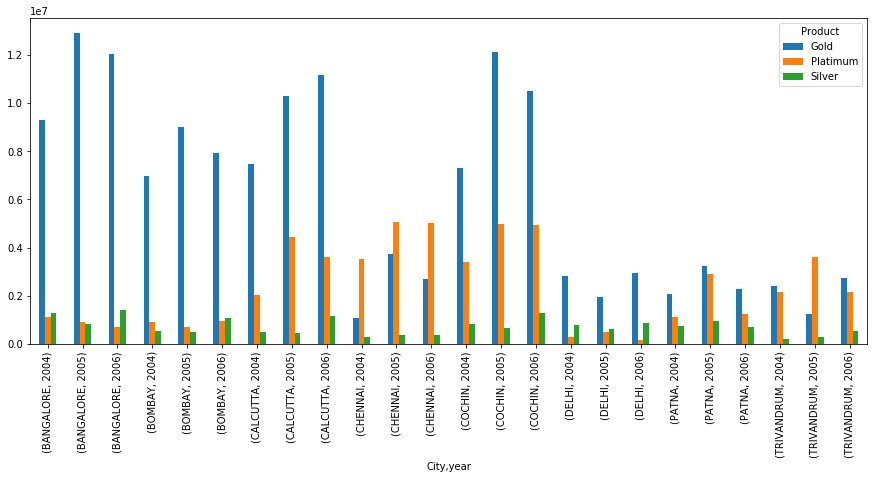

In [152]:
city_spend.pivot_table(index = ['City','year'], columns = 'Product', values = 'SumOf_Amount').plot(kind='bar',figsize=(15,6))
plt.show()

### 4. Create graphs for
### a. Monthly comparison of total spends, city wise

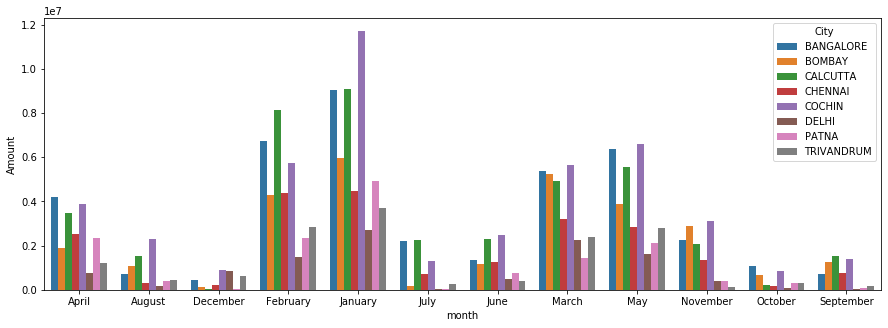

In [160]:
mon_spent = cust_spend.groupby(['City','month'])[['Amount']].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = 'month', y = 'Amount',hue = 'City', data = mon_spent)
plt.show()

### b. Comparison of yearly spend on air tickets

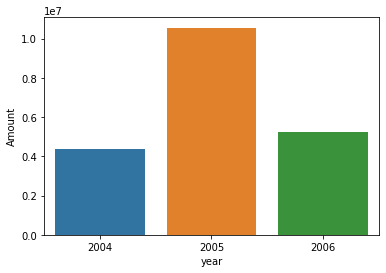

In [165]:
air_ticket = cust_spend[cust_spend['Type'] == 'AIR TICKET']

cust_air = air_ticket.groupby('year')[['Amount']].sum().reset_index()
sns.barplot(x = 'year', y = 'Amount', data = cust_air)

plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

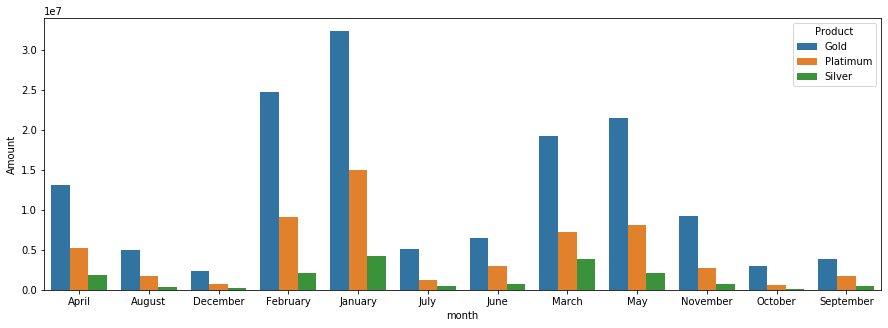

In [171]:
mon_product = cust_spend.groupby(['Product','month'])[['Amount']].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x = 'month', y = 'Amount', hue = 'Product', data = mon_product)
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [177]:
cust_repay['year'] = cust_repay['Month'].dt.year
cust_repay['month'] = cust_repay['Month'].dt.month_name()

def top10Customers(product_category,time_period):
    return cust_repay[(cust_repay['Product'] == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [180]:
top10Customers('Gold','month')

,Customer,City,Product,month,Amount
173,A61,COCHIN,Gold,April,2844218.02
2,A1,BANGALORE,Gold,January,2691069.24
108,A29,CALCUTTA,Gold,May,2652565.30
166,A60,CALCUTTA,Gold,January,2644000.37
94,A27,CHENNAI,Gold,May,2634606.19
163,A60,CALCUTTA,Gold,April,2538452.89
114,A30,BANGALORE,Gold,May,2441784.70
176,A61,COCHIN,Gold,January,2407765.75
31,A13,BANGALORE,Gold,February,2398159.78
130,A42,BOMBAY,Gold,January,2365175.12
